<a href="https://colab.research.google.com/github/trabajogrado28/Tesis/blob/main/Despu%C3%A9s_de_K_medias_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/fetal2021.csv'
data = pd.read_csv(ruta)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.patches import Ellipse
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from itertools import product
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import necessary functions
import umap
from scipy.stats import entropy
datos_fetal2021 = data
datos_fetal2021.head(6)

,Unnamed: 0,cod_dpto,cod_munic,a_defun,sit_defun,otrsitiode,tipo_defun,ano,mes,hora,...,c_muerteb,c_muertec,c_muerted,c_muertee,asis_med,causa_mult,c_bas1,causa_667,idprofcer,cau_homol
0,0,23,1,1,1,NaN,1,2021,8,14.0,...,1.0,NaN,NaN,NaN,1,P022/P95,P022,402,1,80
1,1,17,380,1,1,NaN,1,2021,6,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80
2,2,70,1,1,1,NaN,1,2021,6,12.0,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
3,3,5,1,1,1,NaN,1,2021,6,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
4,4,54,1,1,1,NaN,1,2021,6,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80
5,5,11,1,1,1,NaN,1,2021,6,10.0,...,1.0,NaN,NaN,NaN,1,P014,P014,402,1,80


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.patches import Ellipse
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from itertools import product
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import necessary functions
import umap
from scipy.stats import entropy
datos_fetal2020 = data
datos_fetal2020.head(6)

,Unnamed: 0,cod_dpto,cod_munic,a_defun,sit_defun,otrsitiode,tipo_defun,ano,mes,hora,...,c_muerteb,c_muertec,c_muerted,c_muertee,asis_med,causa_mult,c_bas1,causa_667,idprofcer,cau_homol
0,0,23,1,1,1,NaN,1,2021,8,14.0,...,1.0,NaN,NaN,NaN,1,P022/P95,P022,402,1,80
1,1,17,380,1,1,NaN,1,2021,6,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80
2,2,70,1,1,1,NaN,1,2021,6,12.0,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
3,3,5,1,1,1,NaN,1,2021,6,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
4,4,54,1,1,1,NaN,1,2021,6,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80
5,5,11,1,1,1,NaN,1,2021,6,10.0,...,1.0,NaN,NaN,NaN,1,P014,P014,402,1,80


In [6]:
datos_importantes = datos_fetal2021[['cod_dpto', 'seg_social', 'niv_edum', 'edad_madre']]

In [7]:
datos_rangos = datos_importantes[(datos_importantes["seg_social"] < 9) & (datos_importantes["niv_edum"] < 99) & (datos_importantes["edad_madre"] < 99)]
datos_rangos.head(4)

,cod_dpto,seg_social,niv_edum,edad_madre
0,23,2,3,1.0
1,17,2,9,6.0
2,70,2,4,5.0
3,5,1,9,4.0


In [8]:
# Total antes del filtrado
total_original = len(datos_importantes)

# Total después del filtrado
total_filtrado = len(datos_rangos)

# Porcentaje eliminado
porcentaje_eliminado = (total_original - total_filtrado) / total_original * 100

print(f"Porcentaje de datos eliminados: {porcentaje_eliminado:.2f}%")

Porcentaje de datos eliminados: 7.09%


In [9]:
datos_importantes.seg_social.isnull()

,seg_social
0,False
1,False
2,False
3,False
4,False
...,...
30704,False
30705,False
30706,False
30707,False


In [10]:
datos_importantes.edad_madre.isnull()

,edad_madre
0,False
1,False
2,False
3,False
4,False
...,...
30704,False
30705,False
30706,False
30707,False


In [11]:
# Filtra para conservar solo las filas que cumplan con las condiciones (seg_social < 9, niv_edum < 99, edad_madre < 99)
datos_filtros = datos_importantes[(datos_importantes["seg_social"] < 9) &
                                  (datos_importantes["niv_edum"] < 99) &
                                  (datos_importantes["edad_madre"] < 99) ]

# Reemplaza el DataFrame original con los datos filtrados
datos_importantes = datos_filtros

In [12]:
print(datos_filtros)

       cod_dpto  seg_social  niv_edum  edad_madre
0            23           2         3         1.0
1            17           2         9         6.0
2            70           2         4         5.0
3             5           1         9         4.0
5            11           1         9         5.0
...         ...         ...       ...         ...
30702        25           5         3         2.0
30705        11           1         4         4.0
30706        27           2         2         6.0
30707        88           2         4         4.0
30708         8           2         3         4.0

[28533 rows x 4 columns]


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a todas las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(datos_filtros)

In [14]:
print(data_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [15]:
print(f"numero de variables binarias generadas: {data_encoded.shape[1]}")

numero de variables binarias generadas: 60


In [16]:
# Convertir a DataFrame con los nombres de las columnas
columnas_categoricas = encoder.get_feature_names_out(datos_filtros.columns)
datos_finales = pd.DataFrame(data_encoded, columns=columnas_categoricas)

# Mostrar las primeras filas para verificar
print(datos_finales.head())

   cod_dpto_5  cod_dpto_8  cod_dpto_11  cod_dpto_13  cod_dpto_15  cod_dpto_17  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          0.0          0.0          0.0          1.0   
2         0.0         0.0          0.0          0.0          0.0          0.0   
3         1.0         0.0          0.0          0.0          0.0          0.0   
4         0.0         0.0          1.0          0.0          0.0          0.0   

   cod_dpto_18  cod_dpto_19  cod_dpto_20  cod_dpto_23  ...  niv_edum_13  \
0          0.0          0.0          0.0          1.0  ...          0.0   
1          0.0          0.0          0.0          0.0  ...          0.0   
2          0.0          0.0          0.0          0.0  ...          0.0   
3          0.0          0.0          0.0          0.0  ...          0.0   
4          0.0          0.0          0.0          0.0  ...          0.0   

   edad_madre_1.0  edad_madre_2.0  edad_madre_3.0  edad_madre_

In [17]:
def calcular_entropia_global(df):
    entropias = {}
    for col in df.columns:
        conteo = df[col].value_counts(normalize=True)  # Probabilidad de cada categoría
        entropia_columna = entropy(conteo, base=2)  # Entropía de Shannon
        entropias[col] = entropia_columna
    return entropias

In [18]:
# Aplicar la función a las variables categóricas
variables_categoricas = ['cod_dpto_5', 'cod_dpto_8', 'cod_dpto_11', 'cod_dpto_13', 'cod_dpto_15',
       'cod_dpto_17', 'cod_dpto_18', 'cod_dpto_19', 'cod_dpto_20',
       'cod_dpto_23', 'cod_dpto_25', 'cod_dpto_27', 'cod_dpto_41',
       'cod_dpto_44', 'cod_dpto_47', 'cod_dpto_50', 'cod_dpto_52',
       'cod_dpto_54', 'cod_dpto_63', 'cod_dpto_66', 'cod_dpto_68',
       'cod_dpto_70', 'cod_dpto_73', 'cod_dpto_76', 'cod_dpto_81',
       'cod_dpto_85', 'cod_dpto_86', 'cod_dpto_88', 'cod_dpto_91',
       'cod_dpto_94', 'cod_dpto_95', 'cod_dpto_97', 'cod_dpto_99',
       'seg_social_1', 'seg_social_2', 'seg_social_3', 'seg_social_4',
       'seg_social_5', 'niv_edum_1', 'niv_edum_2', 'niv_edum_3', 'niv_edum_4',
       'niv_edum_5', 'niv_edum_6', 'niv_edum_7', 'niv_edum_8', 'niv_edum_9',
       'niv_edum_10', 'niv_edum_11', 'niv_edum_12', 'niv_edum_13',
       'edad_madre_1.0', 'edad_madre_2.0', 'edad_madre_3.0', 'edad_madre_4.0',
       'edad_madre_5.0', 'edad_madre_6.0', 'edad_madre_7.0', 'edad_madre_8.0',
       'edad_madre_9.0']
entropias = calcular_entropia_global(datos_finales[variables_categoricas])

In [19]:
# Mostrar los resultados
for var, ent in entropias.items():
    print(f"Entropía de {var}: {ent:.4f}")

Entropía de cod_dpto_5: 0.4951
Entropía de cod_dpto_8: 0.1763
Entropía de cod_dpto_11: 0.7819
Entropía de cod_dpto_13: 0.1303
Entropía de cod_dpto_15: 0.1090
Entropía de cod_dpto_17: 0.0647
Entropía de cod_dpto_18: 0.0767
Entropía de cod_dpto_19: 0.0637
Entropía de cod_dpto_20: 0.0786
Entropía de cod_dpto_23: 0.3769
Entropía de cod_dpto_25: 0.2083
Entropía de cod_dpto_27: 0.0351
Entropía de cod_dpto_41: 0.3029
Entropía de cod_dpto_44: 0.0823
Entropía de cod_dpto_47: 0.2009
Entropía de cod_dpto_50: 0.1710
Entropía de cod_dpto_52: 0.2241
Entropía de cod_dpto_54: 0.2776
Entropía de cod_dpto_63: 0.0281
Entropía de cod_dpto_66: 0.0858
Entropía de cod_dpto_68: 0.2292
Entropía de cod_dpto_70: 0.2345
Entropía de cod_dpto_73: 0.0983
Entropía de cod_dpto_76: 0.4682
Entropía de cod_dpto_81: 0.1491
Entropía de cod_dpto_85: 0.0186
Entropía de cod_dpto_86: 0.1261
Entropía de cod_dpto_88: 0.0447
Entropía de cod_dpto_91: 0.0045
Entropía de cod_dpto_94: 0.0091
Entropía de cod_dpto_95: 0.0224
Entropía d

In [20]:
# Normalizar los datos codificados entre 0 y 1 antes de RBM
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos_finales)

In [21]:
# Configuración de la Máquina de Boltzmann Restringida (RBM)
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100, random_state=42)

# Entrenar la RBM
datos_rbm = rbm.fit_transform(datos_normalizados)

# Convertir a DataFrame para visualización
datos_rbm_df = pd.DataFrame(datos_rbm)

# Mostrar las primeras filas de las características aprendidas por la RBM
print("Representaciones aprendidas por la RBM:")
print(datos_rbm_df.head())

Representaciones aprendidas por la RBM:
          0         1         2         3             4         5         6  \
0  0.742308  0.993090  0.003669  0.987690  2.786126e-07  0.999733  0.007208   
1  0.495721  0.992600  0.014784  0.996498  9.958778e-01  0.994582  0.001193   
2  0.067860  0.991685  0.001329  0.997490  9.998934e-01  0.999040  0.001603   
3  0.004683  0.996543  0.999092  0.999950  9.967056e-01  0.001076  0.996839   
4  0.003684  0.997247  0.999244  0.999504  9.971563e-01  0.012985  0.000800   

          7         8         9  
0  0.000908  0.941193  0.999400  
1  0.000946  0.995714  0.000021  
2  0.002199  0.994808  0.999831  
3  0.979693  0.011903  0.000008  
4  0.997487  0.998658  0.000016  


In [22]:
# Calcular la reconstrucción manualmente
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Propagar hacia la capa oculta
activaciones_ocultas = sigmoide(np.dot(data_encoded, rbm.components_.T) + rbm.intercept_hidden_)

# Reconstruir la entrada desde la capa oculta
X_reconstruido = sigmoide(np.dot(activaciones_ocultas, rbm.components_) + rbm.intercept_visible_)

# Calcular el error de reconstrucción
error_reconstruccion = np.mean((data_encoded - X_reconstruido) ** 2)
print(f"Error de reconstrucción de la RBM: {error_reconstruccion}")

Error de reconstrucción de la RBM: 0.020264900707146455


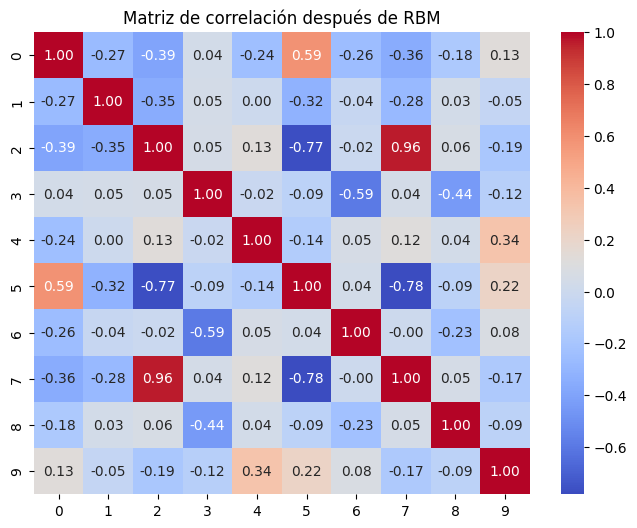

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación de las variables después de la RBM
correlation_matrix = pd.DataFrame(datos_rbm).corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación después de RBM")
plt.show()

# **K-medias**

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(datos_rbm)  # Usar la variable correcta que contiene las características transformadas por la RBM

# Asignar los clusters al DataFrame original
datos_importantes["Cluster"] = kmeans.labels_

# Ver las primeras filas con los clusters asignados
print(datos_importantes.head())

   cod_dpto  seg_social  niv_edum  edad_madre  Cluster
0        23           2         3         1.0        2
1        17           2         9         6.0        2
2        70           2         4         5.0        2
3         5           1         9         4.0        0
5        11           1         9         5.0        0


Estadísticas descriptivas por cluster:
          cod_dpto  seg_social  niv_edum  edad_madre
Cluster                                             
0        32.041230    1.000000  5.743171    4.452929
1        35.402910    4.726984  4.273545    3.788095
2        39.640964    2.000000  3.633493    4.204680
3        38.521024    2.000000  4.156390    3.410504


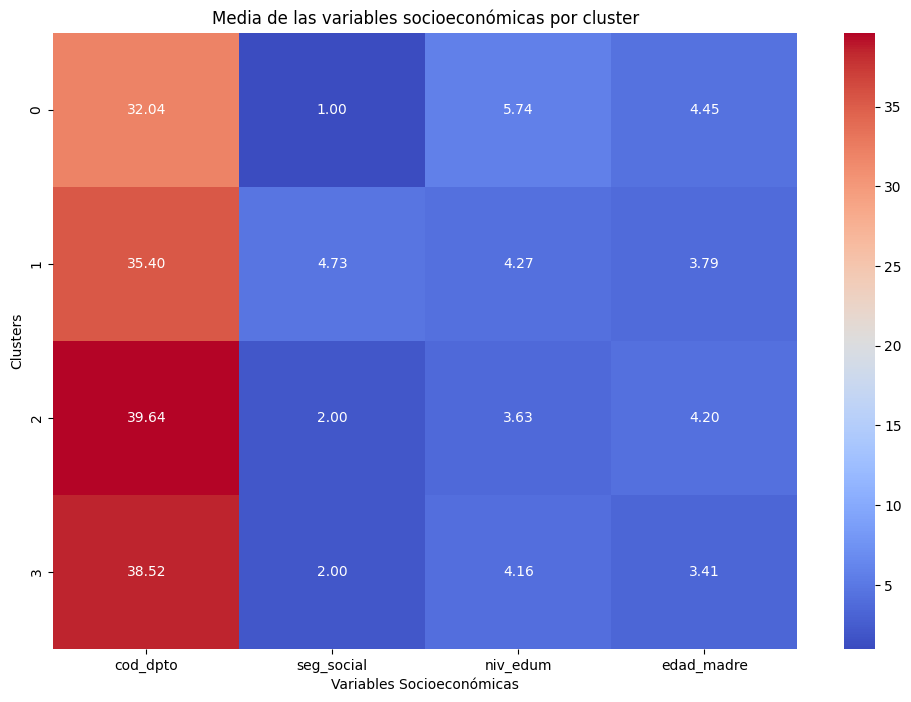

In [25]:
# Agrupar por cluster y calcular estadísticas
estadisticas_cluster = datos_importantes.groupby("Cluster").mean()

print("Estadísticas descriptivas por cluster:")
print(estadisticas_cluster)

# Visualizar las estadísticas con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(estadisticas_cluster, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Media de las variables socioeconómicas por cluster")
plt.xlabel("Variables Socioeconómicas")
plt.ylabel("Clusters")
plt.show()

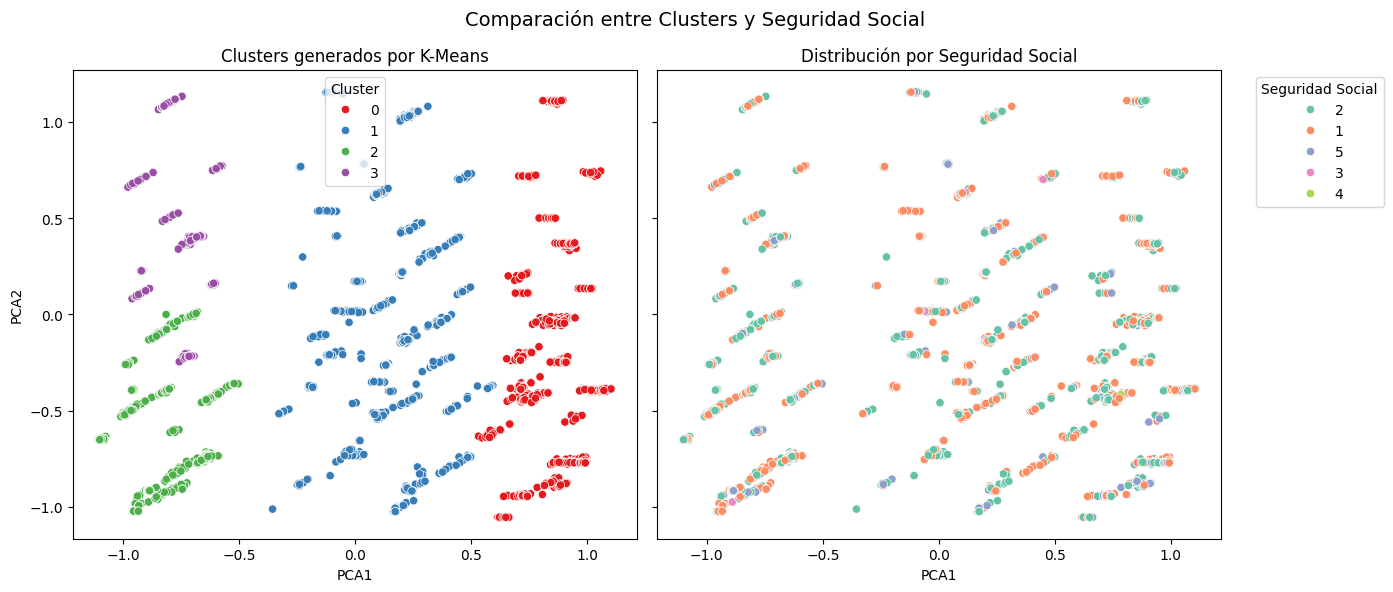

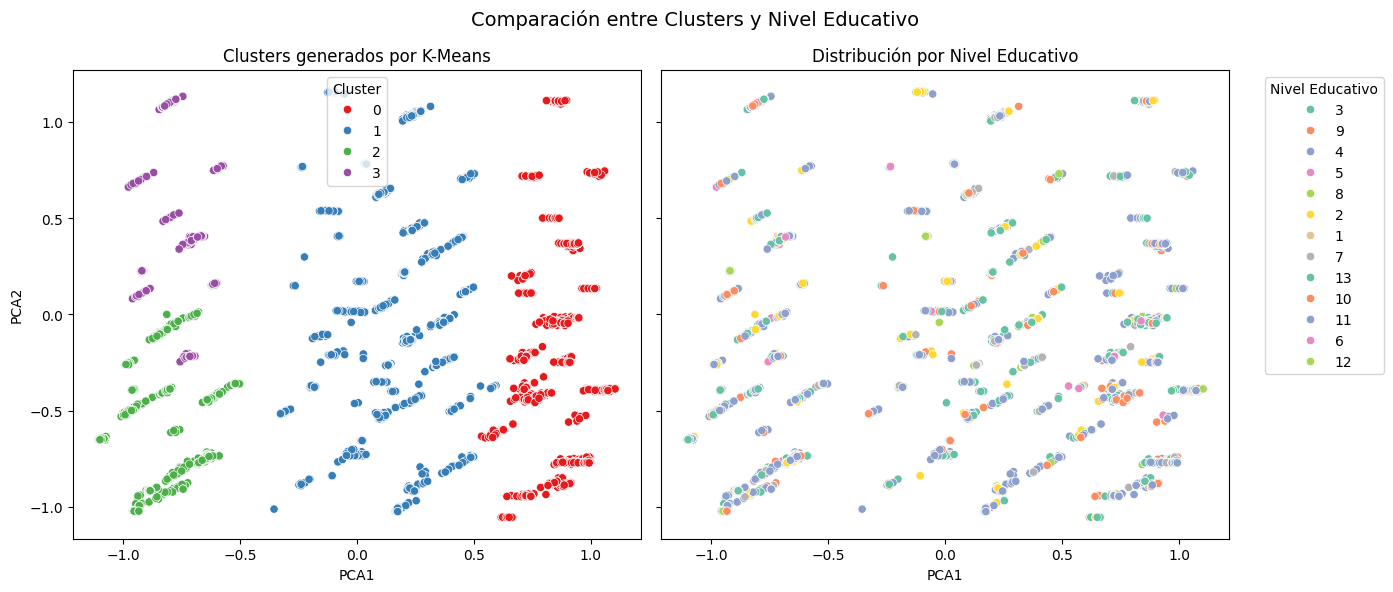

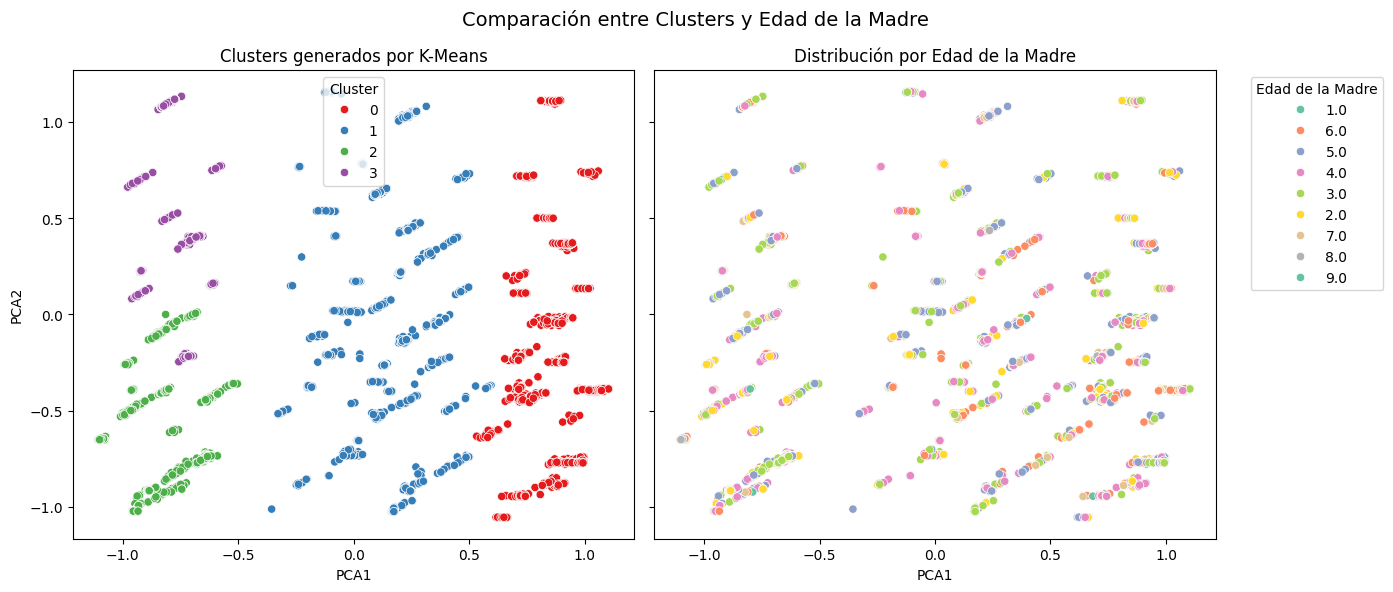

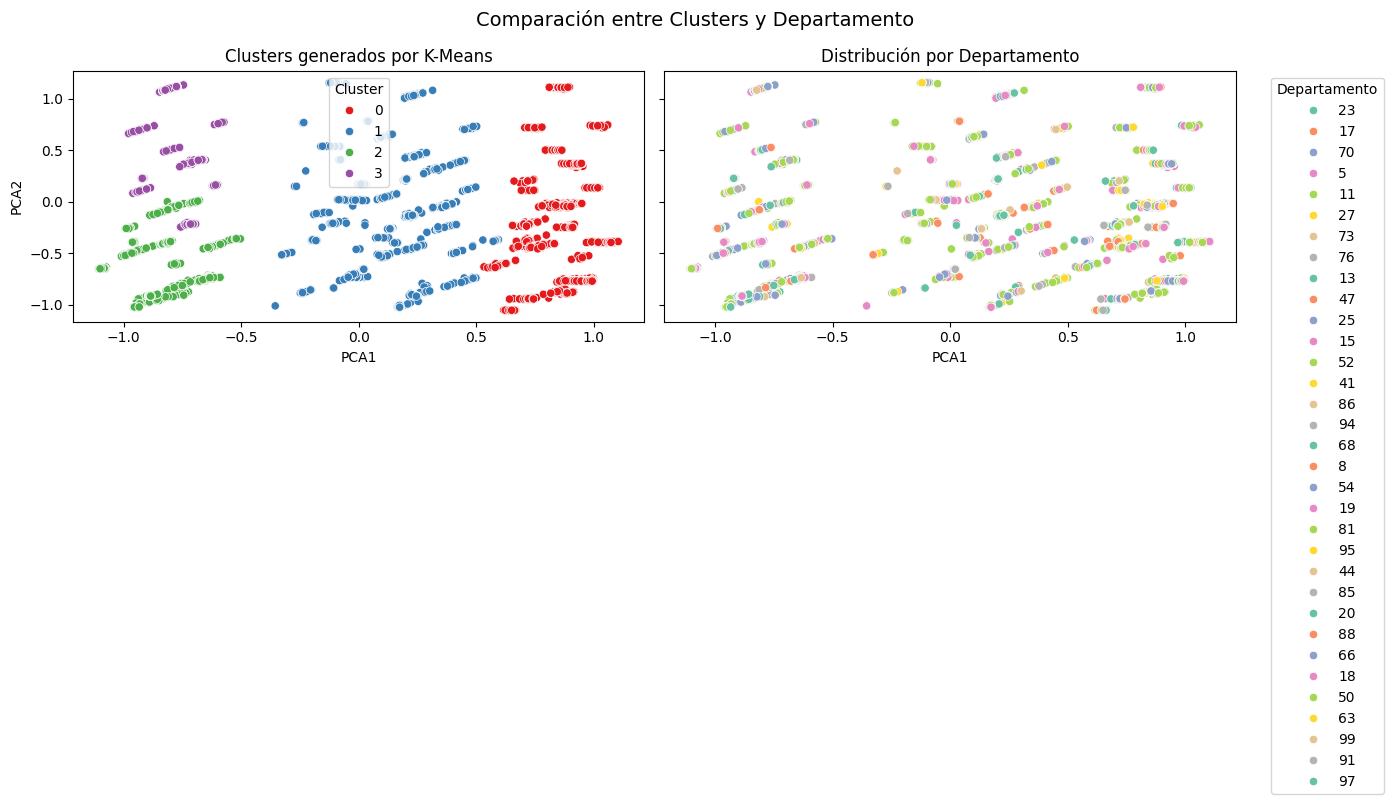

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar PCA para proyectar los datos a 2D (si ya lo hiciste antes puedes saltar esto)
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_rbm)

# Crear un DataFrame base para graficar
df_base = pd.DataFrame(datos_pca, columns=["PCA1", "PCA2"])
df_base["Cluster"] = kmeans.labels_

# Lista de variables originales para comparar
variables_originales = {
    "seg_social": "Seguridad Social",
    "niv_edum": "Nivel Educativo",
    "edad_madre": "Edad de la Madre",
    "cod_dpto": "Departamento"
}

# Crear una figura por cada variable comparando los clústeres con la variable original
for var, nombre in variables_originales.items():
    df_base["Referencia"] = datos_importantes[var].astype(str)  # convertir a string para usar como categoría

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

    sns.scatterplot(data=df_base, x="PCA1", y="PCA2", hue="Cluster", palette="Set1", ax=axes[0])
    axes[0].set_title("Clusters generados por K-Means")
    axes[0].legend(title="Cluster")

    sns.scatterplot(data=df_base, x="PCA1", y="PCA2", hue="Referencia", palette="Set2", ax=axes[1])
    axes[1].set_title(f"Distribución por {nombre}")
    axes[1].legend(title=nombre, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f"Comparación entre Clusters y {nombre}", fontsize=14)
    plt.tight_layout()
    plt.show()

In [27]:

from scipy.stats import entropy

def calcular_entropia_por_cluster(df, cluster_col, variable_col):
    entropias = {}

    for cluster_id in sorted(df[cluster_col].unique()):
        grupo = df[df[cluster_col] == cluster_id][variable_col]
        conteo = grupo.value_counts(normalize=True)
        ent = entropy(conteo, base=2)
        entropias[cluster_id] = ent

    return entropias

# Variables que quieres evaluar
variables = ['cod_dpto', 'edad_madre', 'niv_edum', 'seg_social']

# Calcular y mostrar entropías
for var in variables:
    entropias = calcular_entropia_por_cluster(datos_importantes, 'Cluster', var)
    print(f"\nEntropía por cluster respecto a '{var}':")
    for cluster, ent in entropias.items():
        print(f"  Cluster {cluster}: Entropía = {ent:.4f} bits")


Entropía por cluster respecto a 'cod_dpto':
  Cluster 0: Entropía = 3.3830 bits
  Cluster 1: Entropía = 3.8884 bits
  Cluster 2: Entropía = 4.3215 bits
  Cluster 3: Entropía = 4.2369 bits

Entropía por cluster respecto a 'edad_madre':
  Cluster 0: Entropía = 2.4921 bits
  Cluster 1: Entropía = 2.4722 bits
  Cluster 2: Entropía = 2.2543 bits
  Cluster 3: Entropía = 0.9768 bits

Entropía por cluster respecto a 'niv_edum':
  Cluster 0: Entropía = 2.4880 bits
  Cluster 1: Entropía = 2.2651 bits
  Cluster 2: Entropía = 2.1492 bits
  Cluster 3: Entropía = 2.0391 bits

Entropía por cluster respecto a 'seg_social':
  Cluster 0: Entropía = 0.0000 bits
  Cluster 1: Entropía = 0.5854 bits
  Cluster 2: Entropía = 0.0000 bits
  Cluster 3: Entropía = 0.0000 bits


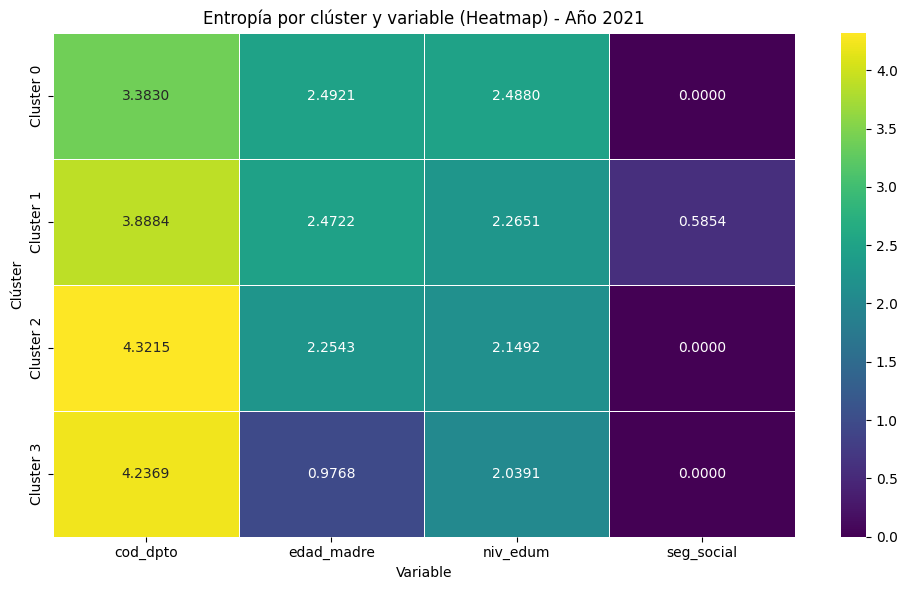

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear el DataFrame corregido con los nuevos valores de entropía para 2021
df_entropia_2021 = pd.DataFrame({
    'cod_dpto': [3.3830, 3.8884, 4.3215, 4.2369],
    'edad_madre': [2.4921, 2.4722, 2.2543, 0.9768],
    'niv_edum': [2.4880, 2.2651, 2.1492, 2.0391],
    'seg_social': [0.0000, 0.5854, 0.0000, 0.0000]
}, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

# Generar el Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_entropia_2021, annot=True, cmap="viridis", fmt=".4f", linewidths=0.5)
plt.title("Entropía por clúster y variable (Heatmap) - Año 2021")
plt.xlabel("Variable")
plt.ylabel("Clúster")
plt.tight_layout()
plt.show()


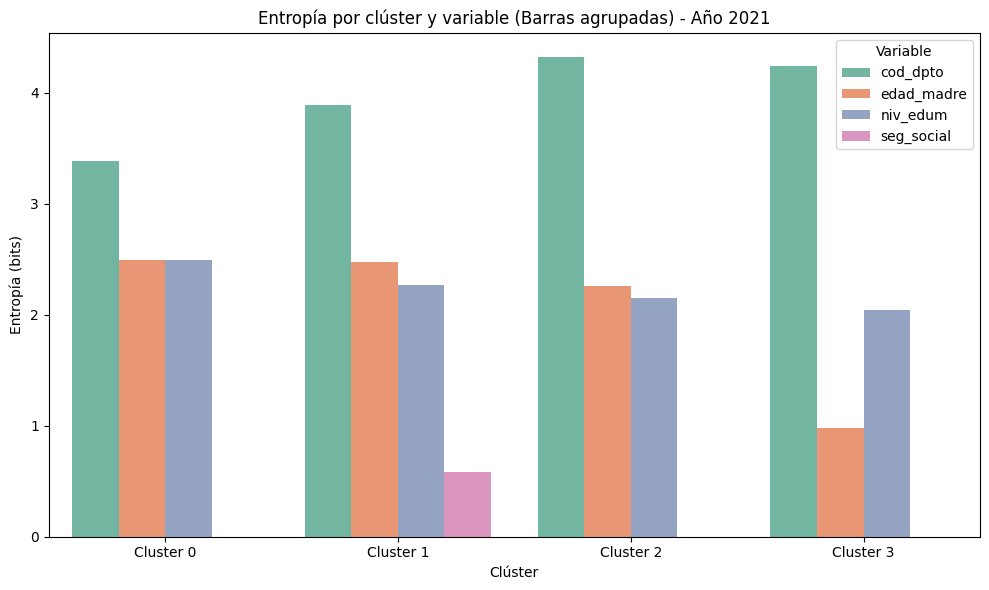

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame corregido de entropía 2021
df_entropia_2021 = pd.DataFrame({
    'cod_dpto': [3.3830, 3.8884, 4.3215, 4.2369],
    'edad_madre': [2.4921, 2.4722, 2.2543, 0.9768],
    'niv_edum': [2.4880, 2.2651, 2.1492, 2.0391],
    'seg_social': [0.0000, 0.5854, 0.0000, 0.0000]
}, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

# Reorganizar los datos para el gráfico de barras
df_entropia_bar = df_entropia_2021.reset_index().melt(id_vars="index", var_name="Variable", value_name="Entropía")
df_entropia_bar.rename(columns={"index": "Clúster"}, inplace=True)

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=df_entropia_bar, x="Clúster", y="Entropía", hue="Variable", palette="Set2")
plt.title("Entropía por clúster y variable (Barras agrupadas) - Año 2021")
plt.ylabel("Entropía (bits)")
plt.xlabel("Clúster")
plt.legend(title="Variable")
plt.tight_layout()
plt.show()
